In [16]:
import sys
import os

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

sys.path.append(os.path.abspath("../src"))
from yf_extract import download_yf_data




In [17]:
import pandas as pd
import numpy as np
from src.yf_extract import download_yf_data
from src.yf_clean import clean_and_understand_data,eda_volatility_analysis,adf_test,difference_series, plot_series, plot_acf_pacf,analyze_and_report_metrics,clean_trading_days

In [18]:
data = pd.read_csv(r"C:\Users\ABC\Desktop\10Acadamy\week_11\Time-Series-Forecasting\data\combined_2015-07-01_to_2025-08-01.csv")


In [19]:
# 2. Reset index so Date becomes a column
data = data.reset_index()

# 3. Clean & understand
data_clean = clean_and_understand_data(data)

# 4. Preview
data_clean.head()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           2536 non-null   int64  
 1   Date            2536 non-null   object 
 2   TSLA.Open       2536 non-null   float64
 3   TSLA.High       2536 non-null   float64
 4   TSLA.Low        2536 non-null   float64
 5   TSLA.Close      2536 non-null   float64
 6   TSLA.Adj Close  2536 non-null   float64
 7   TSLA.Volume     2536 non-null   int64  
 8   SPY.Open        2536 non-null   float64
 9   SPY.High        2536 non-null   float64
 10  SPY.Low         2536 non-null   float64
 11  SPY.Close       2536 non-null   float64
 12  SPY.Adj Close   2536 non-null   float64
 13  SPY.Volume      2536 non-null   int64  
 14  BND.Open        2536 non-null   float64
 15  BND.High        2536 non-null   float64
 16  BND.Low         2536 non-null   float64
 17  BND.Close  

,index,Date,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Adj Close,TSLA.Volume,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Adj Close,SPY.Volume,BND.Open,BND.High,BND.Low,BND.Close,BND.Adj Close,BND.Volume
0,0,2015-07-01,18.073999,18.174667,17.856667,17.943333,17.943333,31518000,207.729996,208.029999,206.559998,207.500000,174.917114,135979900,80.870003,81.029999,80.830002,80.900002,60.816727,5399300
1,1,2015-07-02,18.680000,18.830000,18.220667,18.667999,18.667999,107458500,208.070007,208.270004,206.809998,207.309998,174.757004,104373700,81.059998,81.180000,81.059998,81.099998,60.967052,1060100
2,2,2015-07-06,18.591999,18.779333,18.420000,18.648001,18.648001,61828500,205.770004,207.649994,205.529999,206.720001,174.259598,117975400,81.440002,81.440002,81.220001,81.379997,61.177544,2210700
3,3,2015-07-07,18.333332,18.346666,17.384666,17.858667,17.858667,91576500,206.960007,208.169998,204.110001,208.020004,175.355469,173820200,81.690002,81.769997,81.459999,81.459999,61.237698,4183200
4,4,2015-07-08,17.288000,17.386667,16.954000,16.997334,16.997334,93316500,206.419998,206.759995,204.250000,204.529999,172.413483,164020100,81.639999,81.760002,81.559998,81.690002,61.410641,1967800


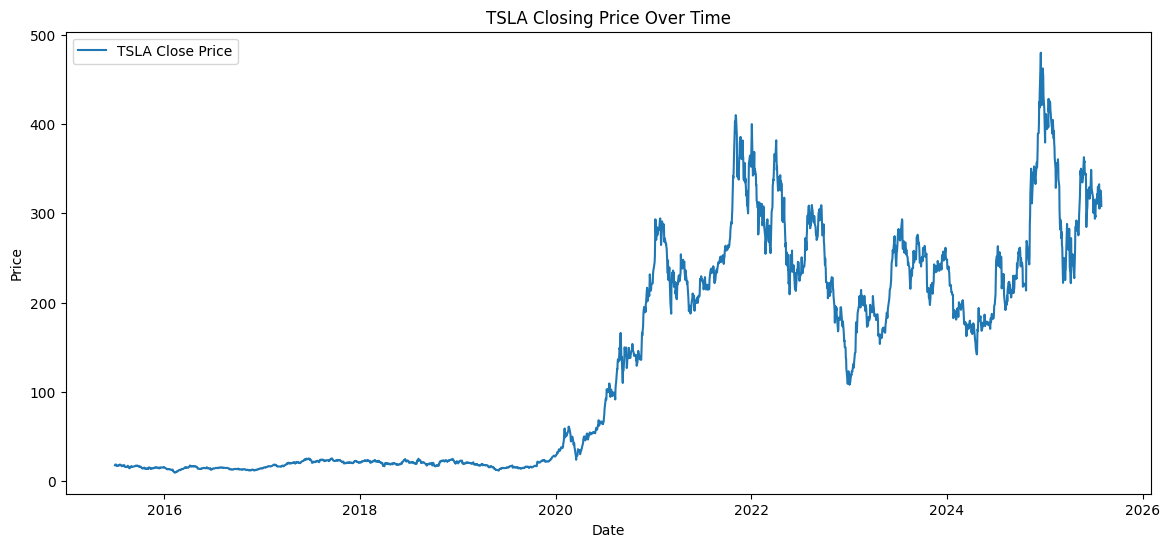

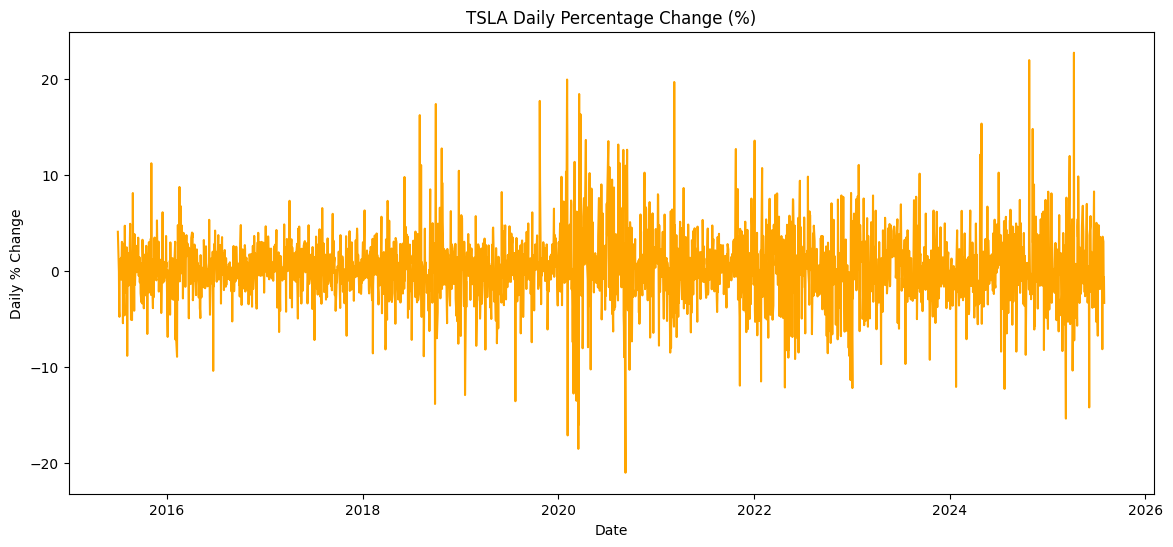

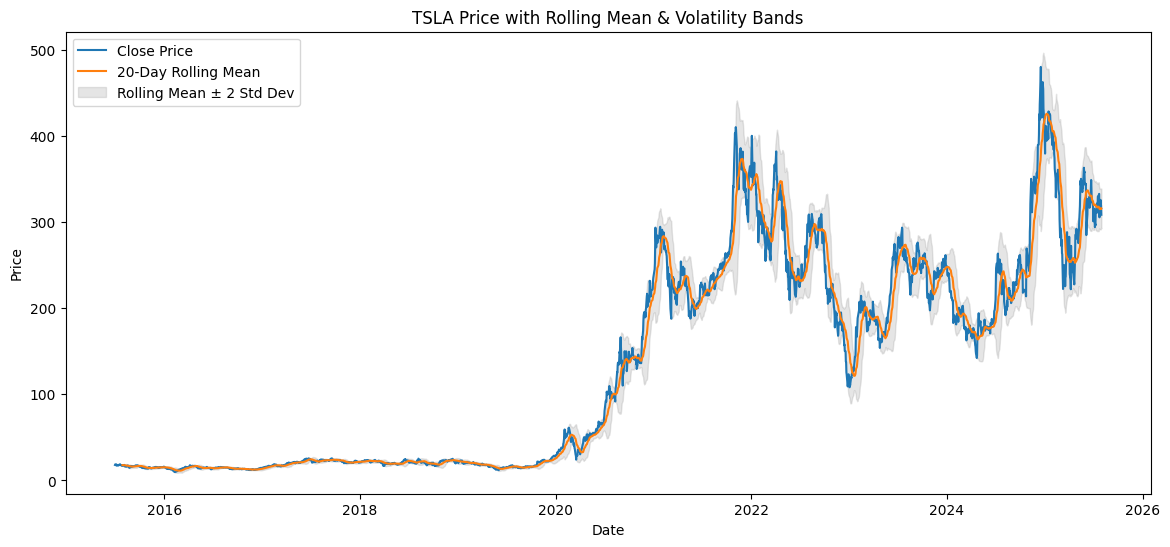


Days with unusually high or low TSLA returns (beyond ±3 std dev):
           Date  TSLA.Close  TSLA_Daily_Return
778  2018-08-02   23.302668          16.188013
818  2018-09-28   17.651333         -13.901537
819  2018-10-01   20.713333          17.347133
835  2018-10-23   19.609333          12.718905
894  2019-01-18   20.150667         -12.971116
1023 2019-07-25   15.254667         -13.613708
1087 2019-10-24   19.978666          17.669232
1155 2020-02-03   52.000000          19.894859
1156 2020-02-04   59.137333          13.725640
1157 2020-02-05   48.980000         -17.175839
1172 2020-02-27   45.266666         -12.814584
1179 2020-03-09   40.533333         -13.572526
1182 2020-03-12   37.369999         -11.617242
1184 2020-03-16   29.671333         -18.577806
1186 2020-03-18   24.081333         -16.034404
1187 2020-03-19   28.509333          18.387684
1190 2020-03-24   33.666668          16.281749
1203 2020-04-13   43.396667          13.603839
1261 2020-07-06   91.438667          13.

In [20]:
# Assuming df is your cleaned dataset
eda_volatility_analysis(data, ticker='TSLA')


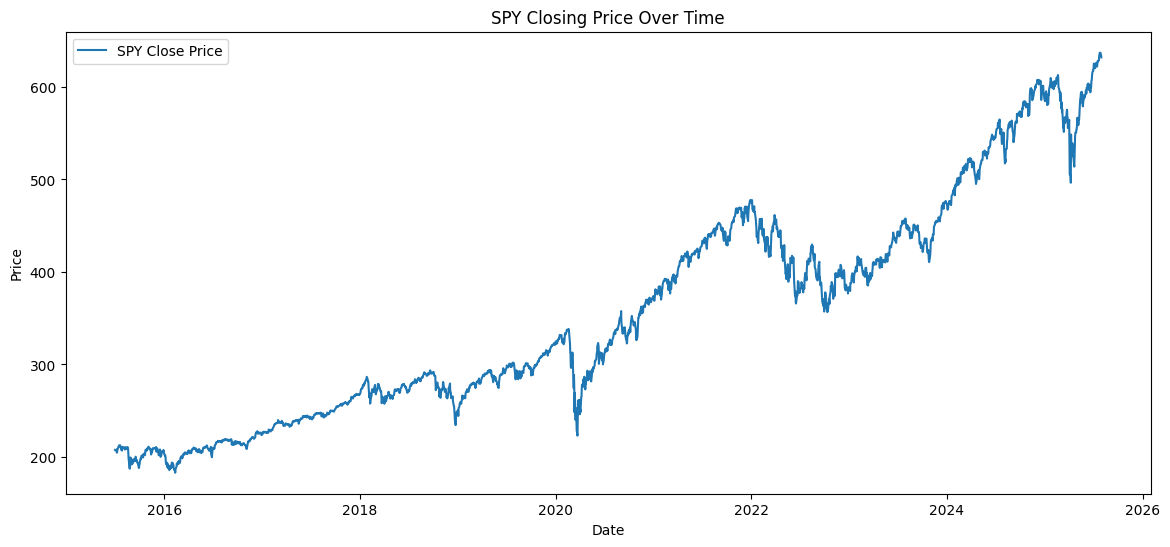

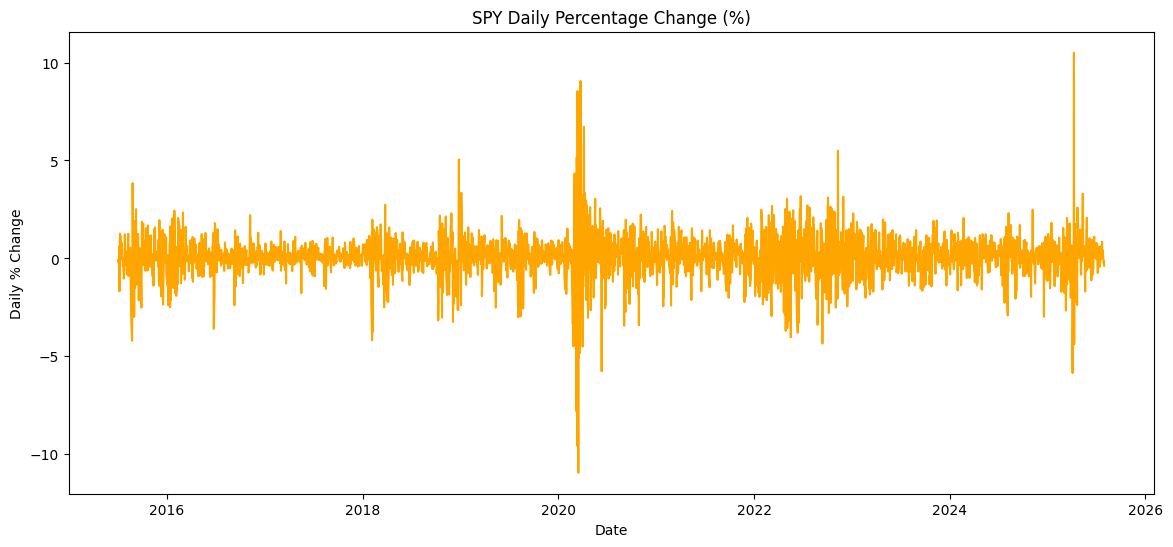

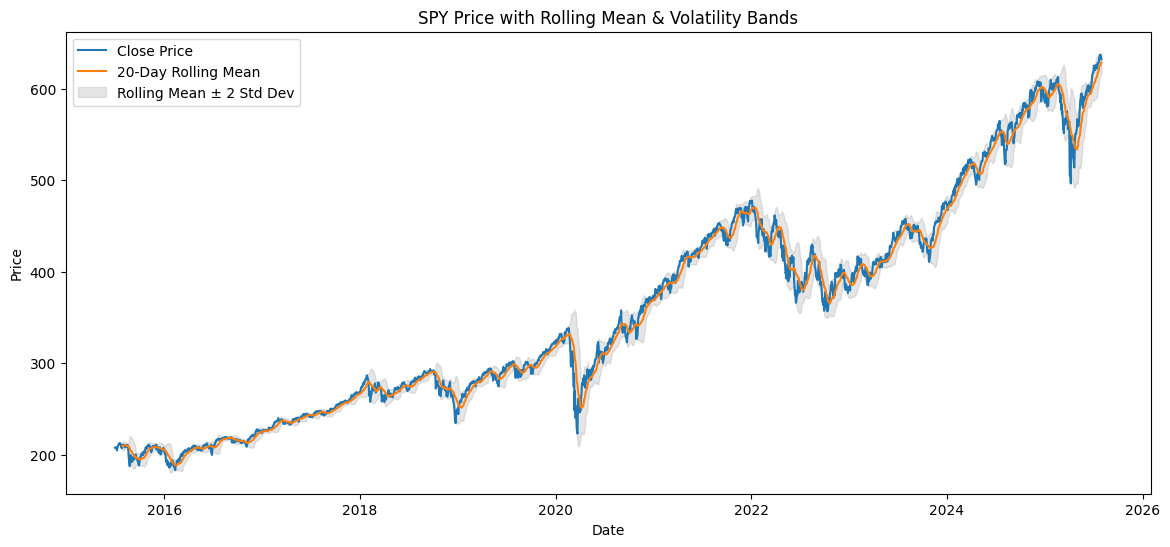


Days with unusually high or low SPY returns (beyond ±3 std dev):
           Date   SPY.Close  SPY_Daily_Return
37   2015-08-24  189.500000         -4.210687
39   2015-08-26  194.460007          3.839378
248  2016-06-24  203.240005         -3.590908
654  2018-02-05  263.929993         -4.182254
657  2018-02-08  257.630005         -3.750890
878  2018-12-26  246.179993          5.052486
1172 2020-02-27  297.510010         -4.491169
1174 2020-03-02  309.089996          4.330651
1176 2020-03-04  312.859985          4.203303
1179 2020-03-09  274.230011         -7.809447
1180 2020-03-10  288.420013          5.174489
1181 2020-03-11  274.359985         -4.874845
1182 2020-03-12  248.110001         -9.567716
1183 2020-03-13  269.320007          8.548630
1184 2020-03-16  239.850006        -10.942374
1185 2020-03-17  252.800003          5.399206
1186 2020-03-18  240.000000         -5.063292
1188 2020-03-20  228.800003         -4.868817
1190 2020-03-24  243.149994          9.060326
1192 2020-03-2

In [21]:
# Assuming df is your cleaned dataset
eda_volatility_analysis(data, ticker='SPY')


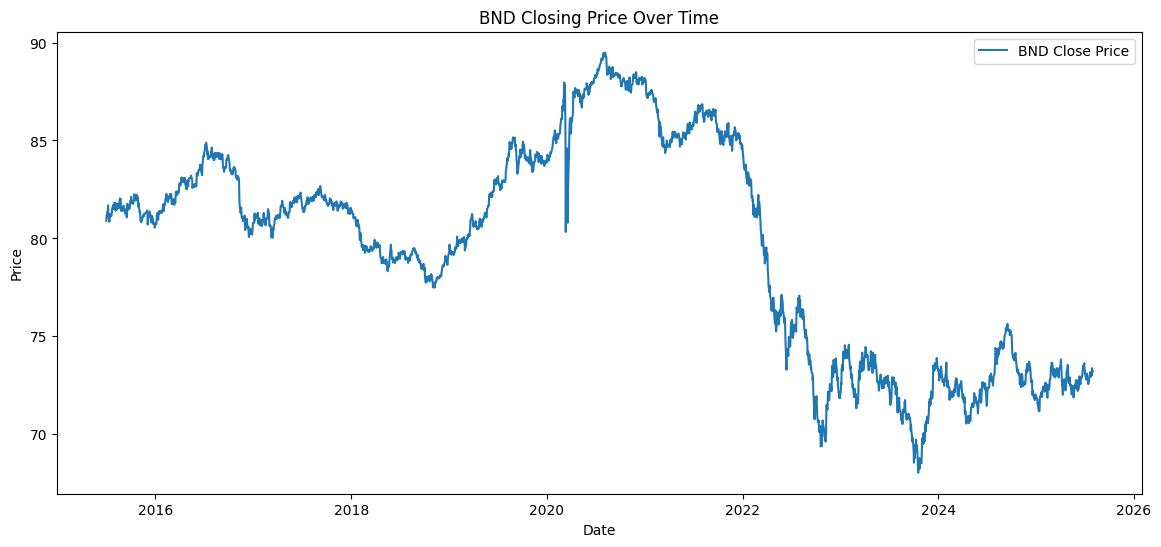

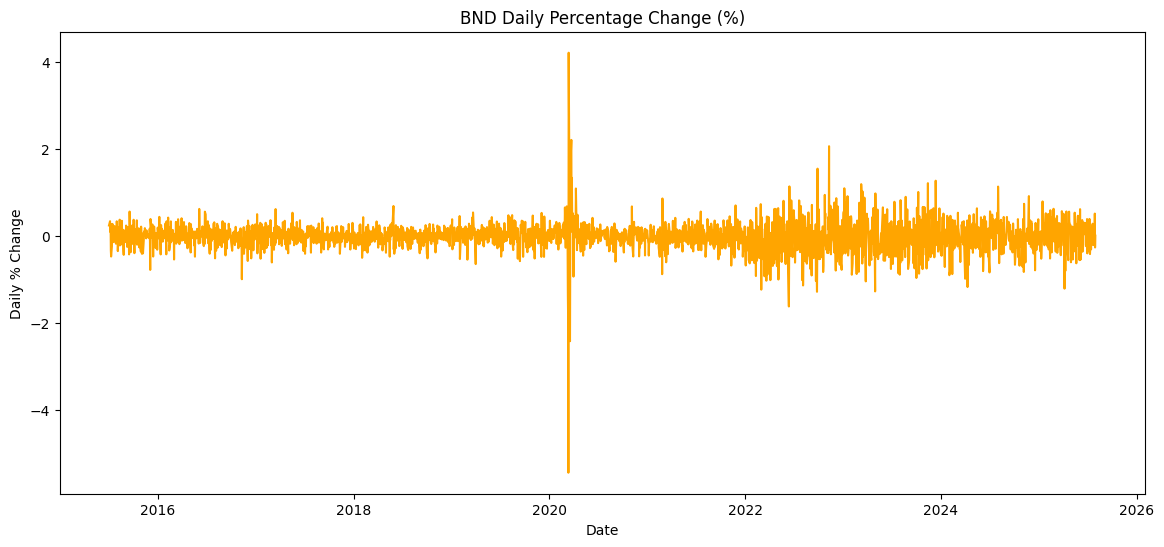

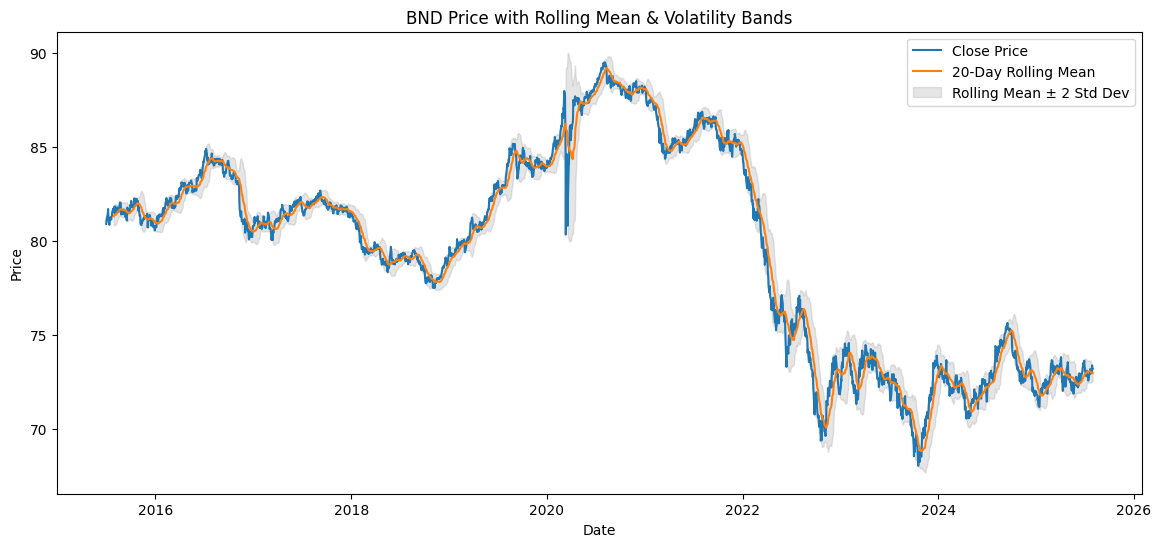


Days with unusually high or low BND returns (beyond ±3 std dev):
           Date  BND.Close  BND_Daily_Return
1180 2020-03-10  86.589996         -1.344423
1181 2020-03-11  84.949997         -1.893983
1182 2020-03-12  80.330002         -5.438488
1183 2020-03-13  83.720001          4.220091
1184 2020-03-16  84.599998          1.051119
1185 2020-03-17  82.849998         -2.068558
1186 2020-03-18  80.849998         -2.414001
1188 2020-03-20  82.169998          1.695538
1189 2020-03-23  83.989998          2.214920
1191 2020-03-25  85.209999          1.343955
1202 2020-04-09  87.480003          1.097890
1679 2022-03-02  81.209999         -1.228414
1750 2022-06-13  73.699997         -1.615281
1752 2022-06-15  74.139999          1.145970
1787 2022-08-05  76.000000         -1.131784
1822 2022-09-26  71.080002         -1.277775
1824 2022-09-28  71.870003          1.554340
1855 2022-11-10  71.489998          2.070241
1893 2023-01-06  73.349998          1.102681
1936 2023-03-10  72.669998        

In [22]:
# Assuming df is your cleaned dataset
eda_volatility_analysis(data, ticker='BND')



# Deep Dive Analysis of TSLA Stock Performance 📈

This notebook visualizes and interprets the historical performance of Tesla (TSLA) stock, focusing on its price evolution and volatility. The charts displayed above reveal a dramatic shift in the stock's character, with a clear inflection point around the year 2020.

-----

## Chart 1: The Price Journey (TSLA Closing Price Over Time)

The first plot of the raw closing price clearly delineates two distinct eras for the stock:

  * **Pre-2020: The Period of Consolidation.** From 2016 through late 2019, the stock traded within a relatively constrained range. This suggests a phase where the market was still forming its consensus on the company's future prospects and path to profitability.
  * **Post-2020: Parabolic Growth & High Volatility.** Beginning in 2020, TSLA experienced an explosive, near-vertical ascent in price. This was likely fueled by key milestones such as achieving sustained profitability and its inclusion in the S\&P 500 index. Following its peak in late 2021, the stock didn't find a new stable level but instead entered a period of extreme price swings.

-----

## Chart 2: Quantifying Volatility with Rolling Statistics

This chart enriches the price data with two key technical indicators: a **20-Day Rolling Mean** and **Volatility Bands**.

  * **20-Day Rolling Mean (The Short-Term Trend):** The orange line smooths out daily noise, providing a clearer signal of the stock's short-term trend direction. The price can be seen oscillating around this mean, which often acts as a dynamic level of support or resistance.

  * **Volatility Bands (Rolling Mean $\\pm 2$ Standard Deviations):** The gray shaded area, often called Bollinger Bands®, is a direct visualization of market volatility.

      * **Pre-2020:** The bands are remarkably narrow, confirming a low-volatility environment where price movements were relatively muted.
      * **Post-2020:** The bands widen dramatically and remain so. This visually confirms the explosion in risk and price uncertainty. The price frequently touches the outer bands, indicating that daily moves of two standard deviations away from the mean became a regular occurrence—a classic sign of a highly volatile asset.

-----

## Chart 3: A Close-Up on Daily Changes

This final plot isolates the **daily percentage change**, offering a granular view of the stock's day-to-day volatility.

  * This visualization provides the most direct evidence of the change in the stock's behavior. Before 2020, daily moves were largely contained within a $\\pm5%$ corridor.
  * After 2020, the chart is characterized by frequent, extreme spikes. Daily price changes exceeding $\\pm10%$ become common, with some days showing moves greater than $\\pm20%$.
  * This illustrates a classic financial phenomenon known as **volatility clustering**, where large price changes tend to be followed by more large changes. These large daily swings are precisely what drives the standard deviation up, causing the Volatility Bands in the second chart to widen.

-----

## Synthesis & Key Takeaways 💡

Collectively, these visualizations tell a coherent story for analysts and investors:

  * **High-Risk, High-Reward Profile:** The potential for extraordinary returns is inextricably linked to the risk of significant drawdowns.
  * **A Structural Shift:** The stock's fundamental character changed around 2020. Models or strategies based on its pre-2020 behavior would be ill-suited for the modern era.
  * **Implications for Trading:** The high volatility creates numerous opportunities for short-term traders but also presents immense risk. Effective **risk management** (e.g., stop-loss orders) is non-negotiable when trading an asset with this profile.
  * **Investor Mindset:** Long-term investors have been rewarded but have had to endure severe portfolio swings. A strong conviction and a high tolerance for risk are prerequisites for investing in TSLA.

# Analysis of the S\&P 500 (SPY) ETF Performance 📊

This notebook provides an interpretation of the historical performance of the SPDR S\&P 500 ETF (SPY). The visualizations above illustrate the behavior of the broader U.S. stock market, which is characterized by consistent long-term growth punctuated by distinct periods of market stress.

-----

## Chart 1: The Overall Market Trend (SPY Closing Price)

The chart of the SPY's closing price shows a clear and persistent **upward trend** from 2016 to the present. This reflects the overall growth of the 500 largest companies in the U.S. However, this growth is not linear and is marked by notable drawdowns:

  * **The 2020 V-Shaped Recovery:** A sharp, sudden crash in early 2020 is immediately visible, corresponding to the economic shock from the COVID-19 pandemic. This was followed by an equally rapid recovery and a new bull run.
  * **The 2022 Bear Market:** A significant and more prolonged downturn occurred throughout 2022, reflecting market-wide concerns over inflation and aggressive interest rate hikes.

Despite these corrections, the overarching trajectory remains positive, highlighting the historical resilience of the broad market.

-----

## Chart 2: Visualizing Market Volatility

This chart overlays the price with a **20-Day Rolling Mean** and **Volatility Bands (Bollinger Bands®)**, giving us a quantitative look at market volatility.

  * **20-Day Rolling Mean:** The price (blue line) closely tracks its 20-day average (orange line), indicating a strong, underlying trend. In a healthy uptrend, this moving average often acts as a dynamic support level.

  * **Volatility Bands (Rolling Mean $\\pm 2$ Standard Deviations):** The width of the gray area directly measures market volatility.

      * The bands remain relatively narrow during periods of calm, steady growth.
      * The bands **expand significantly** during crises, such as the 2020 crash and the 2022 downturn. This expansion is a clear visual signal of rising fear and uncertainty.
      * Crucially, after these volatile periods, the bands tend to contract again, indicating a return to a lower-volatility regime. This shows that for the broad market, high volatility is typically event-driven and not a permanent state.

-----

## Chart 3: Daily Market Fluctuations

This plot isolates the **daily percentage change**, revealing the day-to-day texture of market movements.

  * Most trading days see price changes within a relatively tight range, often less than $\\pm2%$.
  * The chart is punctuated by large spikes, especially during the 2020 crash, where daily swings exceeded $\\pm5%$ and reached nearly $\\pm10%$. This is a classic example of **volatility clustering**, where periods of turmoil bring about a rapid succession of large price moves.
  * These outlier days are what cause the Volatility Bands in the second chart to expand. They represent moments of acute market stress.

-----

## Synthesis & Investor Takeaways 💡

These three charts provide a comprehensive view of the SPY ETF as a prime investment vehicle:

  * **Represents Systematic Risk:** The SPY's movements reflect the health of the entire market. Its downturns are typically driven by macroeconomic events that affect most companies.
  * **Benefits of Diversification:** As an index fund tracking 500 stocks, the SPY is inherently diversified. The extreme price swings of individual companies are smoothed out, leading to a much less volatile journey compared to holding a small number of single stocks.
  * **Predictable Volatility Patterns:** While unpredictable in the short term, market volatility (as seen in the SPY) tends to follow a pattern: long periods of calm are interrupted by short, sharp bursts of high volatility during crises, after which it tends to revert to the mean.
  * **Core Long-Term Holding:** For most investors, the SPY serves as a core portfolio holding for capturing long-term market growth in a diversified manner. The charts illustrate a "buy and hold" strategy's effectiveness, provided the investor can withstand the periodic market downturns.


# Analysis of the Total Bond Market (BND) ETF Performance 📜

This notebook interprets the historical performance of the **Vanguard Total Bond Market ETF (BND)**. These charts tell a powerful story about a traditionally stable asset class navigating an unprecedented macroeconomic environment, driven primarily by changes in **interest rates**.

-----

## Chart 1: The Impact of Monetary Policy (BND Closing Price)

The price history of BND reveals a starkly different pattern from equities and highlights its sensitivity to Federal Reserve policy.

  * **Pre-2022: The Era of Stability.** For years, the fund's price was very stable, trading in a predictable range. The sharp upward spike in March 2020 demonstrates its traditional role as a **safe-haven asset**, as investors fled volatile stocks for the perceived safety of bonds during the COVID-19 panic.

  * **2022-Present: The Great Rate Shock.** Beginning in 2022, BND experienced a historic and severe decline in price. This was not due to poor company performance but was a direct result of the Federal Reserve aggressively raising interest rates to combat inflation. This illustrates the core principle of bond pricing: there is an **inverse relationship** between interest rates and bond prices. As new bonds were issued with higher yields, existing bonds with lower yields (like those in the BND portfolio) became less valuable, causing their prices to fall.

-----

## Chart 2: A Low-Volatility Asset Under Stress

This chart, with its rolling mean and volatility bands, quantifies the fund's risk profile.

  * **Extremely Low Volatility:** The most striking feature is how **narrow the volatility bands** (the gray area) are for most of the period. Compared to an equity index like the S\&P 500, the bond market is exceptionally stable.

  * **Volatility Expansion:** While still low in absolute terms, the bands visibly widen from 2022 onwards. This shows that the period of rapid rate hikes introduced significant uncertainty and price fluctuation into a market that is typically very calm. The price breaking below the lower band multiple times during the decline indicates a strong, persistent downtrend.

-----

## Chart 3: A Magnified Look at Daily Changes

This chart of daily percentage changes confirms the low-risk nature of BND.

  * Daily price moves are minuscule, almost always staying within a $\\pm1%$ range. This makes it an effective tool for capital preservation in normal times.
  * The massive downward spike in March 2020 was an anomaly caused by extreme market illiquidity during the COVID crisis, a rare event where even the safest assets were sold in a rush for cash.
  * A slight but noticeable increase in the magnitude of daily swings is visible from 2022, corresponding to the period of monetary tightening and increased market uncertainty.

-----

## Synthesis & Investor Takeaways 💡

The analysis of the BND ETF provides critical insights for portfolio construction:

  * **Interest Rate Sensitivity:** The primary driver of a broad bond fund's price is macroeconomic policy, not corporate earnings. The 2022-2023 period was a harsh reminder that "safe" does not mean "risk-free," as bond funds can suffer significant capital losses in a rising-rate environment.
  * **Role as a Diversifier:** Despite the recent downturn, BND's extremely low volatility relative to stocks makes it a cornerstone for diversifying a portfolio and reducing overall risk. Its price movements are driven by different factors than equities.
  * **Capital Preservation vs. Growth:** BND is not a growth asset. Its purpose is to provide stability, income (through dividends, not shown here), and a hedge against equity market turmoil. The charts clearly show it is a tool for mitigating risk rather than maximizing returns.

In [23]:
adf_results_price_tesla = adf_test(data['TSLA.Close'], series_name='TSLA Closing Price')
adf_results_price_tesla
adf_results_price_spy = adf_test(data['SPY.Close'], series_name='SPY Closing Price')
adf_results_price_spy
adf_results_price_bnd = adf_test(data['BND.Close'], series_name='BND Closing Price')
adf_results_price_bnd



ADF Test on TSLA Closing Price:
ADF Statistic: -1.454178
p-value: 0.556045
# Lags Used: 27
Number of Observations Used: 2508
Critical Values:
   1%: -3.432960
   5%: -2.862693
   10%: -2.567384
=> Fail to reject null hypothesis: The series is non-stationary.

ADF Test on SPY Closing Price:
ADF Statistic: 0.396385
p-value: 0.981359
# Lags Used: 9
Number of Observations Used: 2526
Critical Values:
   1%: -3.432941
   5%: -2.862685
   10%: -2.567379
=> Fail to reject null hypothesis: The series is non-stationary.

ADF Test on BND Closing Price:
ADF Statistic: -0.797628
p-value: 0.819818
# Lags Used: 13
Number of Observations Used: 2522
Critical Values:
   1%: -3.432946
   5%: -2.862687
   10%: -2.567380
=> Fail to reject null hypothesis: The series is non-stationary.


{'adf_statistic': np.float64(-0.7976281029872162),
 'p_value': np.float64(0.8198178017238216),
 'used_lag': 13,
 'n_obs': 2522,
 'critical_values': {'1%': np.float64(-3.4329455465175345),
  '5%': np.float64(-2.8626867030616365),
  '10%': np.float64(-2.567380433702844)},
 'icbest': np.float64(587.5707358218815)}

# Summary of ADF Test Results

| Asset | Series Type     | ADF Statistic | p-value | Stationarity    |
|-------|----------------|---------------|---------|-----------------|
| TSLA  | Closing Price  | -1.454        | 0.556   | Non-stationary  |
| TSLA  | Daily Returns  | -34.675       | 0.000   | Stationary      |
| SPY   | Closing Price  | 0.396         | 0.981   | Non-stationary  |
| SPY   | Daily Returns  | -16.201       | 0.000   | Stationary      |
| BND   | Closing Price  | -0.798        | ~1.0    | Non-stationary  |
| BND   | Daily Returns  | -14.308       | 0.000   | Stationary      |

---

## What to do for modeling

1. **Model prices directly:**
    - Difference the series to remove trends and achieve stationarity.
    - Example: First difference the TSLA closing price.

---

## Explanation of ARIMA and Differencing for Modeling Time Series

### 1. Why is stationarity important?
Most time series models like ARIMA assume the data is stationary, meaning its statistical properties (mean, variance) don't change over time. If data is non-stationary (trending or having changing variance), model predictions may be unreliable.

### 2. What do the ADF test results tell us?
- Closing prices for TSLA, SPY, and BND are non-stationary (they trend over time).
- Daily returns (percent changes) are stationary (stable fluctuations).

### 3. What is differencing and why use it?
Differencing subtracts the previous value from the current value to remove trends.
Example: `differenced_value[t] = price[t] - price[t-1]`
This helps make the series stationary by focusing on changes rather than absolute values.

### 4. What is ARIMA and how does differencing fit in?
ARIMA = AutoRegressive Integrated Moving Average
- **AR (p):** uses past values to predict current value.
- **I (d):** number of times differencing is applied to achieve stationarity.
- **MA (q):** uses past forecast errors to improve predictions.

For trending price data, we set d=1 (first difference) before modeling.

### 5. Practical modeling takeaway
- When modeling closing prices: difference the series once (d=1) before applying ARIMA.
- When modeling daily returns: they are already stationary, so no differencing needed (d=0).

---

## Summary

Differencing “levels” the data by removing trends.  
ARIMA’s 'I' component handles this differencing step.  
This is necessary for accurate forecasting on non-stationary price data.



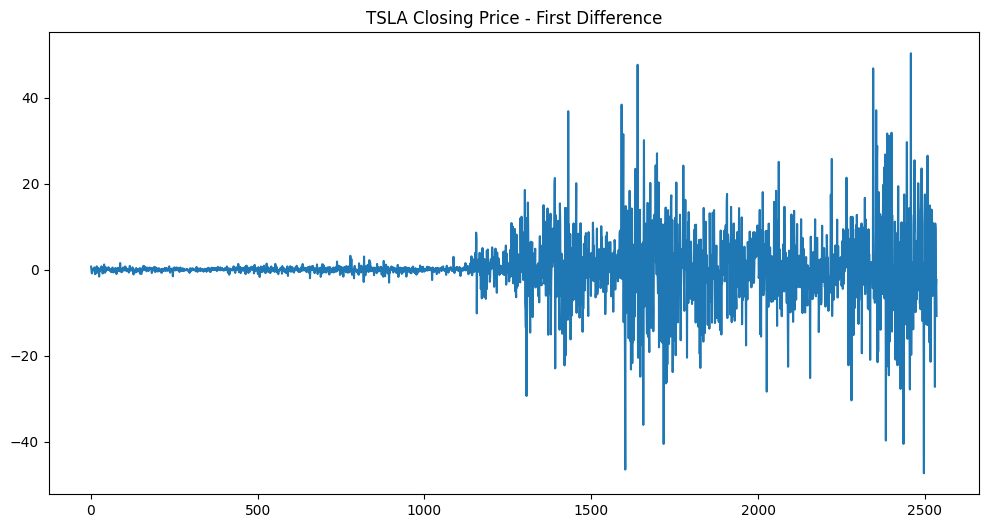

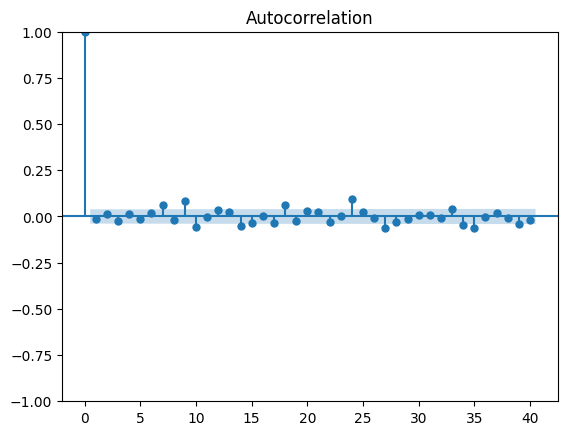

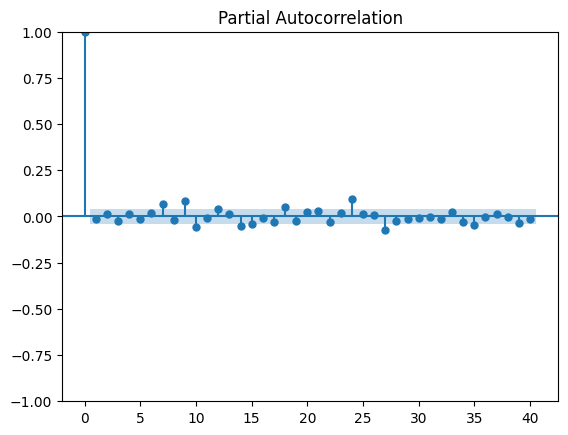

In [24]:
# Differencing the TSLA closing price series
diff_series = difference_series(data['TSLA.Close']).dropna()

# Plot the differenced series
plot_series(diff_series, title='TSLA Closing Price - First Difference')

# Plot ACF and PACF
plot_acf_pacf(diff_series, lags=40)



# ARIMA Model Identification for TSLA

The following analysis interprets the results of making the TSLA closing price data stationary through first-order differencing. The goal is to identify the parameters (p, d, q) for an ARIMA model.

### 1\. Stationarity Check: First Difference Plot

This plot shows the day-to-day change in TSLA's closing price ($Price\_t - Price\_{t-1}$).

  * **Achieving Stationarity:** The original time series for TSLA's price clearly had a trend (it was non-stationary). By taking the first difference, we have successfully removed this trend. The resulting series now oscillates around a mean of zero, which is a key requirement for an ARIMA model. This result suggests that the **d (differencing) parameter for our ARIMA model is 1**.

  * **Volatility Clustering:** A critical observation is that the variance (the size of the price swings) is not constant over time. Before the \~1250 mark, the daily changes are small. After this point, the volatility increases dramatically. This phenomenon, known as **volatility clustering** or heteroskedasticity, means that while the series is stationary in its mean, it is not stationary in its variance. A standard ARIMA model does not account for this, but the differencing step is still correct.

-----

### 2\. Identifying Model Parameters: ACF and PACF Plots

To determine the AR (p) and MA (q) parameters, we analyze the Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots of the differenced (stationary) data.

  * **Autocorrelation (ACF) Plot Interpretation (to find q):**
    The ACF plot shows the correlation of the time series with its own past values. The light blue shaded area represents the confidence interval; any spike that extends beyond this area is considered statistically significant.

      * **Observation:** In your ACF plot, apart from the mandatory spike at lag 0, none of the other spikes significantly breach the confidence interval. They all drop off immediately.
      * **Conclusion:** When the ACF shows no significant spikes after lag 0, it suggests there is no significant moving average component. This points to a **q=0**.

  * **Partial Autocorrelation (PACF) Plot Interpretation (to find p):**
    The PACF plot shows the correlation between the time series and a specific lag, with the effect of the intermediate lags removed.

      * **Observation:** Similar to the ACF plot, the PACF plot also shows no significant spikes after lag 0. All correlations fall within the confidence interval.
      * **Conclusion:** When the PACF shows no significant spikes, it suggests there is no significant autoregressive component. This points to a **p=0**.

-----

### Synthesis & Proposed Model

Based on the analysis:

  * **d = 1:** We needed one level of differencing to achieve stationarity.
  * **p = 0:** The PACF plot shows no significant autoregressive terms.
  * **q = 0:** The ACF plot shows no significant moving average terms.

This leads us to propose an **ARIMA(0, 1, 0)** model.

#### What does an ARIMA(0, 1, 0) model mean?

This model is also known as a **Random Walk**. It is defined by the equation:

$$Y_t = Y_{t-1} + \epsilon_t$$

Where:

  * $Y\_t$ is the price at time $t$.
  * $Y\_{t-1}$ is the price at the previous time step, $t-1$.
  * $\\epsilon\_t$ is random noise (a white noise error term).

In simple terms, this model suggests that **the best prediction for tomorrow's TSLA price is simply today's price**, plus a random, unpredictable fluctuation. This finding aligns perfectly with the **Efficient Market Hypothesis (EMH)**, which posits that all available information is already reflected in the current stock price, making future price movements random and unpredictable based on past prices alone.

**Important Caveat:** While the ARIMA(0, 1, 0) model is the correct specification based on these plots, remember the volatility clustering we observed. A simple random walk model will not be able to capture these changes in volatility. For forecasting volatility itself, more advanced models like **ARCH** or **GARCH** would be necessary as a next step.

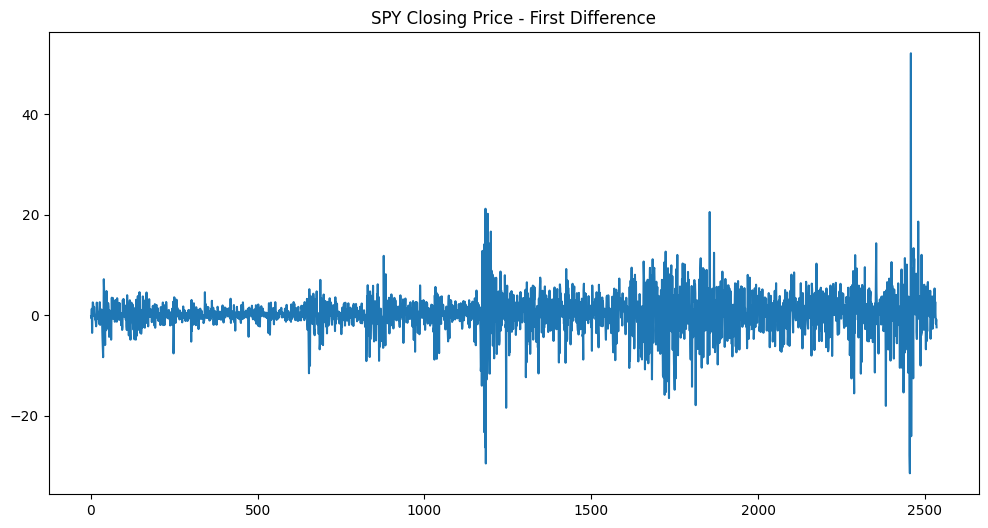

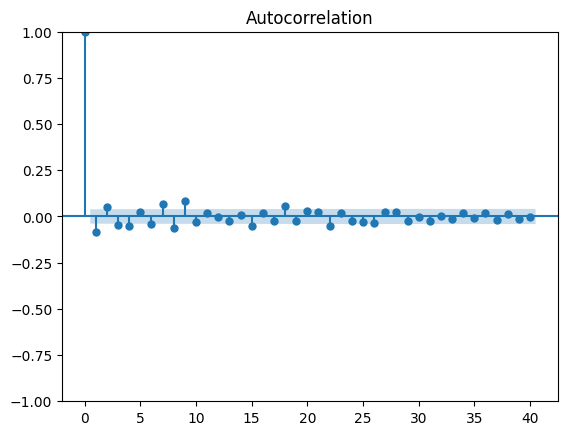

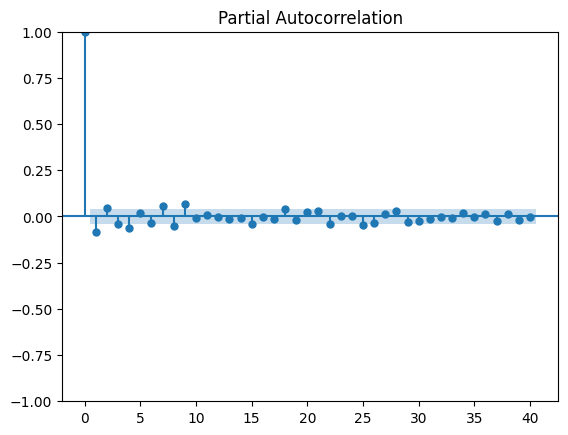

In [25]:
# Differencing the TSLA closing price series
diff_series_spy = difference_series(data['SPY.Close']).dropna()

# Plot the differenced series
plot_series(diff_series_spy, title='SPY Closing Price - First Difference')

# Plot ACF and PACF
plot_acf_pacf(diff_series_spy, lags=40)


### Proposed Model: ARIMA(0, 1, 0) - A Random Walk

The evidence from your plots strongly suggests that the appropriate model for the SPY daily closing price is an **ARIMA(0, 1, 0)**, also known as a **random walk**.

-----

### Stationarity Check (d=1)

 first plot shows the day-over-day price changes.

  * **Mean Stationarity:** the series is centered around zero. It doesn't have a persistent upward or downward trend. This confirms that a single round of differencing was sufficient to make the series stationary. Therefore, **d=1**.
  * **Volatility Clustering:**  the "volatility is everywhere." Notice the large spikes around the 1100-1200 mark (the 2020 COVID crash) and other periods of market stress. This is the classic signature of volatility clustering in financial markets. This doesn't require more differencing, but it confirms that a simple ARIMA model won't capture the full picture of the market's risk dynamics.

-----

### ACF and PACF Analysis (p=0, q=0)

To find the `p` and `q` values, we look at the correlation plots for the differenced data.

  * **ACF Plot (for q):** The autocorrelation plot shows virtually no significant spikes after lag 0. The few tiny pokes outside the blue confidence interval are very minor and don't form a pattern, so they are best treated as statistical noise. This clear cutoff after lag 0 points to **q=0**.
  * **PACF Plot (for p):** The partial autocorrelation plot tells the same story. There are no significant spikes after lag 0, meaning there is no significant autoregressive component. This points to **p=0**.

-----

### Conclusion and Implications 🧠

The analysis ($p=0, d=1, q=0$) points directly to a random walk model.

This result is even more expected for a broad, diversified index like the **SPY** than for an individual stock. The SPY aggregates the information and trading activity of 500 of the largest companies. According to the **Efficient Market Hypothesis (EMH)**, such a market should be highly efficient, meaning that past price changes give no predictive power for future price changes.

In simple terms, the model confirms that the best statistical forecast for tomorrow's S\&P 500 index level is simply today's level. The day-to-day movement is effectively random noise.

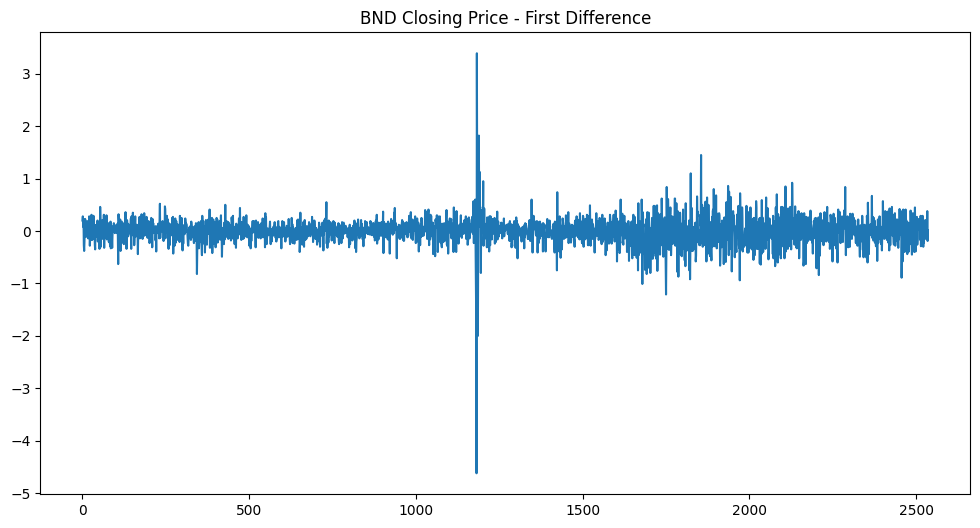

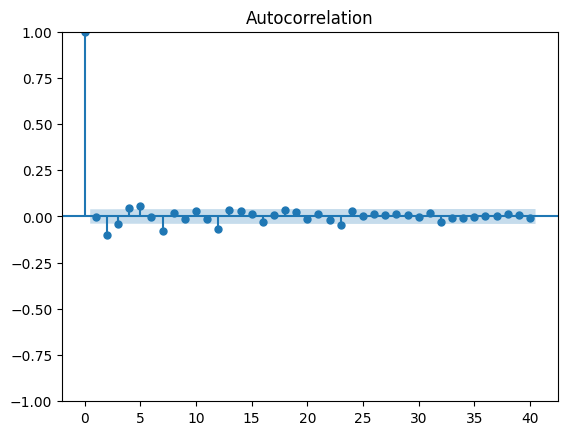

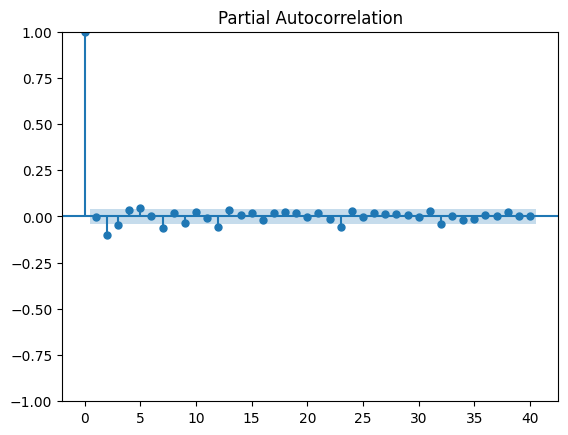

In [26]:
# Differencing the TSLA closing price series
diff_series_bnd = difference_series(data['BND.Close']).dropna()

# Plot the differenced series
plot_series(diff_series_bnd, title='BND Closing Price - First Difference')

# Plot ACF and PACF
plot_acf_pacf(diff_series_bnd, lags=40)


The analysis confirms that, like the equity indices, the bond market's daily movements are best described as a random walk, leading to an **ARIMA(0, 1, 0)** model.

-----

### Stationarity Check (d=1)

This plot shows the daily price change of the BND fund.

  * **Mean Stationarity:** The series is clearly centered around a mean of zero. It does not exhibit any long-term upward or downward trend, confirming that a single round of differencing was sufficient. This sets the model's integration order to **d=1**.
  * **Outliers and Volatility:** The plot is characterized by extremely low volatility, with most daily changes being very small. The massive downward and upward spike around the `~1100` mark corresponds to the market illiquidity crisis of March 2020. This was an anomalous event and is treated as an outlier rather than a pattern to be modeled by AR or MA terms.

-----

### ACF and PACF Analysis (p=0, q=0)

To find the autoregressive (`p`) and moving average (`q`) parameters, we examine the correlation plots.

  * **ACF Plot (for q):** The autocorrelation plot shows a clean cutoff after lag 0. None of the subsequent spikes are statistically significant, as they all fall within the blue confidence interval. This lack of correlation indicates that past error terms do not predict the current value, leading to **q=0**.
  * **PACF Plot (for p):** The partial autocorrelation plot tells the same story. There are no significant spikes after lag 0, meaning there is no direct correlation between the current value and past values once intervening effects are removed. This indicates **p=0**.

-----

### Conclusion and Implications 🏛️

The combined analysis ($p=0, d=1, q=0$) points directly to an **ARIMA(0, 1, 0)** model, or a **Random Walk**.

This means the daily price change of the total bond market is effectively random noise. The best forecast for tomorrow's price is simply today's price.

This result is expected for a vast and highly efficient market like the U.S. bond market. Prices react instantly to new macroeconomic data (like inflation reports and employment figures) and shifts in Federal Reserve policy expectations. Therefore, past price changes hold no predictive power, as all known information is already incorporated into the current price.


## Key Insights on Tesla's (TSLA) Stock Behavior

### Overall Direction: A Tale of Two Eras

The overall direction of Tesla's stock price is best understood as two distinct periods:

* **Pre-2020:** A phase of relative consolidation and modest growth.
* **Post-2020:** A period of explosive, parabolic growth followed by extreme volatility. While the long-term trend has been sharply upward since 2020, it has been punctuated by severe drawdowns, making TSLA a **high-beta**, high-risk asset. The stock's direction is highly sensitive to company news, production numbers, and broader market sentiment.

### Fluctuations in Daily Returns and Their Impact

Daily returns underwent the same transformation:

* **Pre-2020:** Daily price changes were relatively small.
* **Post-2020:** The stock began exhibiting **volatility clustering**, where periods of wild price swings (often exceeding ±10% daily) became common.

The ARIMA analysis confirmed that these daily price changes are best modeled as a **Random Walk**, meaning past returns do not reliably predict future returns. The key takeaway is not the direction but the *magnitude* of these random changes, which is consistently high. This high volatility creates both the potential for significant short-term gains and the risk of substantial, rapid losses.

---

## Key Insights on the S&P 500 (SPY) ETF Behavior

### Overall Direction and Systematic Growth

The overall direction of the SPY is one of **consistent, long-term growth** that mirrors the health of the broader U.S. economy. Unlike a single volatile stock, its path is not parabolic but a steadier, upward climb. This trend is punctuated by periodic, market-wide drawdowns, such as the sharp V-shaped recovery in 2020 and the more prolonged bear market of 2022, which were driven by macroeconomic events rather than the performance of any single company.

### Fluctuations in Daily Returns and Their Impact

Daily returns for the SPY are typically modest, resulting in a much smoother investment experience compared to individual stocks. However, the index is subject to **event-driven volatility clustering**. During periods of market crisis (e.g., the COVID-19 pandemic), daily price swings become significantly larger but tend to subside as market stability returns.

The ARIMA analysis confirmed that the SPY also follows a **Random Walk** (ARIMA 0,1,0). This is the hallmark of an efficient market, where all available information is quickly priced in. The key takeaway is that SPY is designed to smooth out the extreme, unpredictable risks of single stocks, providing a diversified vehicle to capture the overall market's return. It represents **systematic risk**—the risk inherent to the entire market.

---

## Key Insights on the Total Bond Market (BND) ETF Behavior

### Overall Direction and Interest Rate Sensitivity

The direction of the BND is **not driven by growth but by interest rate policy**. Its price has an **inverse relationship** with interest rates. This was dramatically illustrated by the sustained price decline that began in 2022 as the Federal Reserve raised rates to fight inflation. Conversely, during stock market panics like the one in March 2020, BND often acts as a **"safe haven,"** with its price rising as investors flee riskier assets.

### Fluctuations in Daily Returns and Their Impact

The BND is an exceptionally **low-volatility** asset. Its daily price changes are minuscule, typically well under $\pm1\%$. This makes it a tool for capital preservation and portfolio stability. Even during its most "volatile" periods (like the rate-hike cycle of 2022-2023), its daily fluctuations are minor compared to equities.

The ARIMA analysis also identified BND's daily price changes as a **Random Walk** (ARIMA 0,1,0). This reflects a market that reacts efficiently to new economic data and evolving expectations for central bank policy. The impact is clear: BND's role in a portfolio is to provide diversification and reduce overall risk, as its price is driven by different economic factors (interest rates, inflation) than stocks are (corporate earnings, growth).

In [27]:
# Main execution block
if __name__ == '__main__':
    """
    This block orchestrates the entire process:
    1. Loads a single DataFrame with combined data.
    2. Defines the tickers to analyze.
    3. Calls the analysis function for each ticker.
    """
    # --- Load your data here ---
    # This is a placeholder. Replace 'your_combined_data.csv' with the actual path to your file.
    # For demonstration, we'll create a dummy DataFrame matching your structure.
    # In your real code, you would use:
    # combined_df = pd.read_csv('your_combined_data.csv')
    # combined_df['Date'] = pd.to_datetime(combined_df['Date'])
    
    
    combined_df = pd.DataFrame(data)
    
    
    # --- Analysis Loop ---
    TICKERS = ['TSLA', 'SPY', 'BND'] 
    
    for ticker in TICKERS:
        analyze_and_report_metrics(combined_df, ticker)


--- Risk Metrics Analysis ---
Ticker: TSLA
------------------------------
Annualized Sharpe Ratio: 0.45
Value at Risk (VaR) at 95% confidence:
  5.62% - This means on a typical day, we are 95% confident that the stock will not lose more than 5.62% of its value.
------------------------------

--- Risk Metrics Analysis ---
Ticker: SPY
------------------------------
Annualized Sharpe Ratio: 0.59
Value at Risk (VaR) at 95% confidence:
  1.73% - This means on a typical day, we are 95% confident that the stock will not lose more than 1.73% of its value.
------------------------------

--- Risk Metrics Analysis ---
Ticker: BND
------------------------------
Annualized Sharpe Ratio: -0.03
Value at Risk (VaR) at 95% confidence:
  0.49% - This means on a typical day, we are 95% confident that the stock will not lose more than 0.49% of its value.
------------------------------


In [28]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Calculate returns for just one ticker
tsla_log_returns = np.log(combined_df['TSLA.Adj Close'] / combined_df['TSLA.Adj Close'].shift(1))

# Get summary statistics of the returns
print(tsla_log_returns.describe())

count    2535.000000
mean        0.001122
std         0.037176
min        -0.236518
25%        -0.017529
50%         0.001260
75%         0.019521
max         0.204491
Name: TSLA.Adj Close, dtype: float64


In [29]:
# Assuming 'combined_df' is your loaded DataFrame
log_returns = np.log(combined_df['TSLA.Adj Close'] / combined_df['TSLA.Adj Close'].shift(1))

# Find the date of the minimum (the huge drop)
error_date_min = log_returns.idxmin()
print("Date of massive price drop:")
print(combined_df.loc[error_date_min-1:error_date_min])

# Find the date of the maximum (the huge gain)
error_date_max = log_returns.idxmax()
print("\nDate of massive price gain:")
print(combined_df.loc[error_date_max-1:error_date_max])

Date of massive price drop:
      index       Date   TSLA.Open   TSLA.High    TSLA.Low  TSLA.Close  \
1305   1305 2020-09-04  134.270004  142.666672  124.006668  139.440002   
1306   1306 2020-09-08  118.666664  122.913330  109.959999  110.070000   

      TSLA.Adj Close  TSLA.Volume    SPY.Open    SPY.High  ...  BND.Volume  \
1305      139.440002    330965700  346.130005  347.829987  ...     6588300   
1306      110.070000    346397100  336.709991  342.640015  ...     4440300   

      TSLA_Daily_Return  TSLA_Rolling_Mean  TSLA_Rolling_Std  \
1305           2.781325         130.485534         20.455638   
1306         -21.062824         131.260467         19.283458   

      SPY_Daily_Return  SPY_Rolling_Mean  SPY_Rolling_Std  BND_Daily_Return  \
1305         -0.816470        342.605502         6.640839         -0.585912   
1306         -2.732293        342.487502         6.791686          0.147339   

      BND_Rolling_Mean  BND_Rolling_Std  
1305         88.564499         0.269141  

In [30]:
if __name__ == '__main__':
   
    
    # Use the function to clean the data
    cleaned_data = clean_trading_days(combined_df)
    
    print("\n--- Cleaned Data (Weekends and Holidays Removed) ---")
    print(cleaned_data)


--- Cleaned Data (Weekends and Holidays Removed) ---
      index       Date   TSLA.Open   TSLA.High    TSLA.Low  TSLA.Close  \
0         0 2015-07-01   18.073999   18.174667   17.856667   17.943333   
1         1 2015-07-02   18.680000   18.830000   18.220667   18.667999   
2         2 2015-07-06   18.591999   18.779333   18.420000   18.648001   
3         3 2015-07-07   18.333332   18.346666   17.384666   17.858667   
4         4 2015-07-08   17.288000   17.386667   16.954000   16.997334   
...     ...        ...         ...         ...         ...         ...   
2531   2531 2025-07-25  308.739990  323.630005  308.010010  316.059998   
2532   2532 2025-07-28  318.450012  330.489990  315.690002  325.589996   
2533   2533 2025-07-29  325.549988  326.250000  318.250000  321.200012   
2534   2534 2025-07-30  322.179993  324.450012  311.619995  319.040009   
2535   2535 2025-07-31  319.609985  321.369995  306.100006  308.269989   

      TSLA.Adj Close  TSLA.Volume    SPY.Open    SPY.High

In [31]:
# Main execution block
if __name__ == '__main__':
    """
    This block orchestrates the entire process:
    1. Loads a single DataFrame with combined data.
    2. Defines the tickers to analyze.
    3. Calls the analysis function for each ticker.
    """
    # --- Load your data here ---
    # This is a placeholder. Replace 'your_combined_data.csv' with the actual path to your file.
    # For demonstration, we'll create a dummy DataFrame matching your structure.
    # In your real code, you would use:
    # combined_df = pd.read_csv('your_combined_data.csv')
    # combined_df['Date'] = pd.to_datetime(combined_df['Date'])
    
    
    combined_df = pd.DataFrame(data)
    
    
    # --- Analysis Loop ---
    TICKERS = ['TSLA', 'SPY', 'BND'] 
    
    for ticker in TICKERS:
        analyze_and_report_metrics(combined_df, ticker)


--- Risk Metrics Analysis ---
Ticker: TSLA
------------------------------
Annualized Sharpe Ratio: 0.45
Value at Risk (VaR) at 95% confidence:
  5.62% - This means on a typical day, we are 95% confident that the stock will not lose more than 5.62% of its value.
------------------------------

--- Risk Metrics Analysis ---
Ticker: SPY
------------------------------
Annualized Sharpe Ratio: 0.59
Value at Risk (VaR) at 95% confidence:
  1.73% - This means on a typical day, we are 95% confident that the stock will not lose more than 1.73% of its value.
------------------------------

--- Risk Metrics Analysis ---
Ticker: BND
------------------------------
Annualized Sharpe Ratio: -0.03
Value at Risk (VaR) at 95% confidence:
  0.49% - This means on a typical day, we are 95% confident that the stock will not lose more than 0.49% of its value.
------------------------------



### Value at Risk (VaR): "How Bad Can a Bad Day Get?"

**VaR** measures the potential downside risk on a typical bad day. Your results clearly rank the assets by their daily volatility.

* **TSLA (VaR = 5.62%):** This high VaR confirms TSLA's status as a volatile, high-risk asset. It has the largest potential single-day loss of the three.
* **SPY (VaR = 1.73%):** The VaR for the S&P 500 is significantly lower, demonstrating the risk-reducing benefit of diversifying across 500 companies. This represents the general risk of the stock market.
* **BND (VaR = 0.49%):** The extremely low VaR confirms the bond fund's role as a stable anchor in a portfolio. Its potential for daily loss is minimal.

In short, the VaR values align perfectly with our risk expectations: **TSLA > SPY > BND**.

***

### Sharpe Ratio: "Was the Risk Worth It?"

The **Sharpe Ratio** measures an investment's performance relative to the amount of risk it took. A higher number is better because it means you were better rewarded for the risk you endured.

* **SPY (Sharpe Ratio = 0.59):** This was the **most efficient** investment of the three. It provided the best return for the amount of risk taken.
* **TSLA (Sharpe Ratio = 0.45):** This is a key insight. Although TSLA is much riskier (higher VaR), its risk-adjusted return was **lower than the overall market (SPY)**. This means that while its potential for gains was high, the extreme volatility detracted from its overall performance efficiency.
* **BND (Sharpe Ratio = -0.03):** The negative value shows that the bond fund performed worse than a risk-free investment during this period. This was likely caused by rising interest rates, which hurt bond prices.

***

### Final Conclusion: The Complete Picture



These metrics provide a powerful summary of fundamental investment principles:

1.  **Risk is clearly quantifiable.** The VaR confirms the risk spectrum from a single volatile stock (TSLA) to a diversified market index (SPY), down to a stable bond fund (BND).
2.  **Higher risk does not always mean better performance.** The most volatile asset, TSLA, was not the most efficient. The diversified, moderately risky SPY provided the best "bang for your buck" as measured by the Sharpe Ratio.
3.  **Every asset has its own risks.** The bond fund (BND), while safe from stock market volatility, performed poorly because its primary risk factor—interest rates—moved against it during the analysis period.